## Importing Libraries

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import random
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset

In [319]:
dataset = pd.read_csv('adult.csv')

In [320]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [321]:
dataset.shape

(32561, 15)

Removing Empty spaces from the dataset

In [322]:
dataset['workclass'] = dataset['workclass'].str.replace(" ","")
dataset['marital-status'] = dataset['marital-status'].str.replace(" ","")
dataset['occupation'] = dataset['occupation'].str.replace(" ","")
dataset['race'] = dataset['race'].str.replace(" ","")
dataset['native-country'] = dataset['native-country'].str.replace(" ","")

Handling Null Values

In [323]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

We find no Null values but upon further investigation, I find '?' in a few features. 

I decide to handle them with the most frequent values in the respective features.

In [324]:
attrib, counts = np.unique(dataset['workclass'],return_counts=True)
most_freq_attrib = attrib[np.argmax(counts,axis=0)]
dataset['workclass'][dataset['workclass'] == '?'] = most_freq_attrib

In [325]:
attrib, counts = np.unique(dataset['occupation'], return_counts=True)
most_freq_attrib = attrib[np.argmax(counts,axis=0)]
dataset['occupation'][dataset['occupation'] == '?'] = most_freq_attrib

In [326]:
attrib, counts = np.unique(dataset['native-country'], return_counts=True)
most_freq_attrib = attrib[np.argmax(counts,axis=0)]
dataset['native-country'][dataset['native-country'] == '?'] = most_freq_attrib

### Converting target variable into 0s and 1s

In [327]:
income_map = {' <=50K':0, ' >50K':1}
dataset['Income'] = dataset['Income'].map(income_map)

In [328]:
data_num = dataset.drop(["education-num","Income"], axis=1)

In [329]:
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [330]:
dataset.describe(include="O")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


# UNIVARIATE ANALYSIS

### AGE

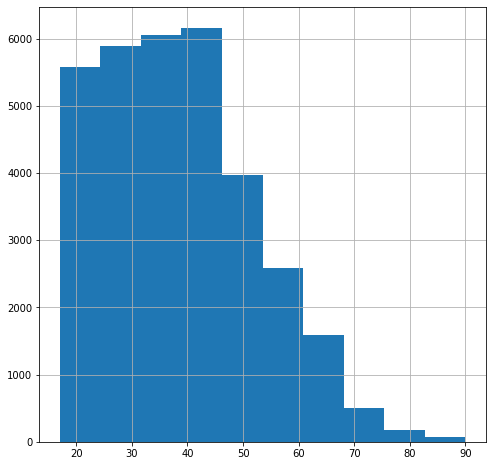

In [331]:
dataset['age'].hist(figsize=(8,8))

The above histogram shows that :



*   "age" attribute is not symmetric.
*   It is right-skewed(But this is totally fine as younger adult earn wages not the older ones)




### HOURS PER WEEK

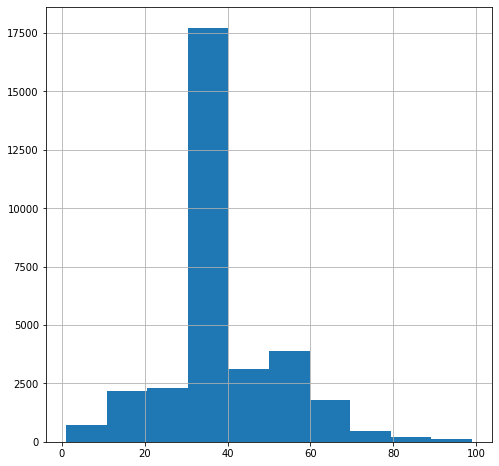

In [332]:
dataset['hours-per-week'].hist(figsize=(8,8))

This histogram of "hours-per-week" shows that:



*   Most people work 30-40 hours per week, they are roughly 27,000 people.
*   75 percentage of the people spend 45 or less working hours per week.



### FNLWGT

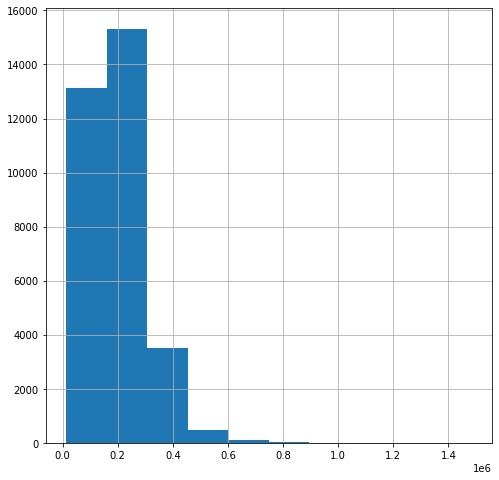

In [333]:
dataset['fnlwgt'].hist(figsize=(8,8))

The above histogram shows that :



*   This is the sampling weight corresponding to the observations.
*   The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).



### CAPITAL-GAIN

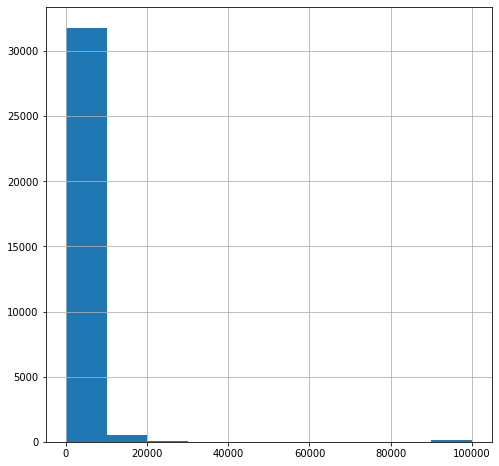

In [334]:
dataset['capital-gain'].hist(figsize=(8,8))



*   This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
*   capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).



### CAPITAL-LOSS

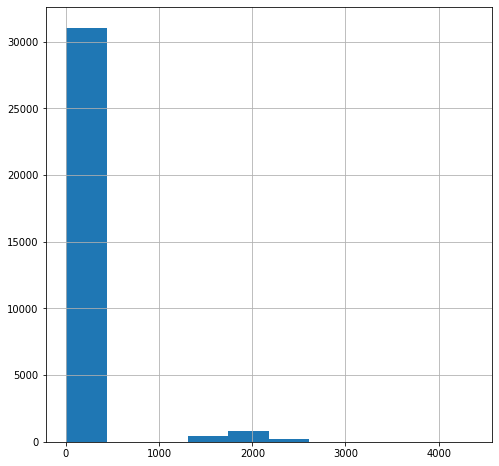

In [335]:
dataset['capital-loss'].hist(figsize=(8,8))



*   This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
*   This attribute is similar to the capital-gain i.e. most of the values are centered on 0.



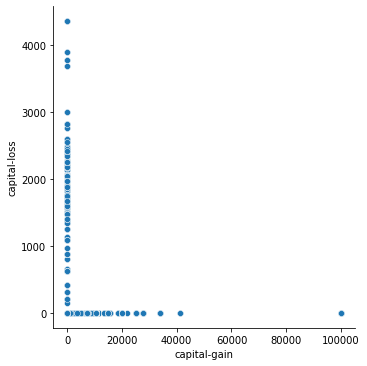

In [336]:
sns.relplot('capital-gain','capital-loss',data = dataset)



*   If capital.gain is zero there is possibility of capital loss being high or above zero.
*   If capital loss is zero there is possibility of capital.gain being high or above zero.



### WORKCLASS

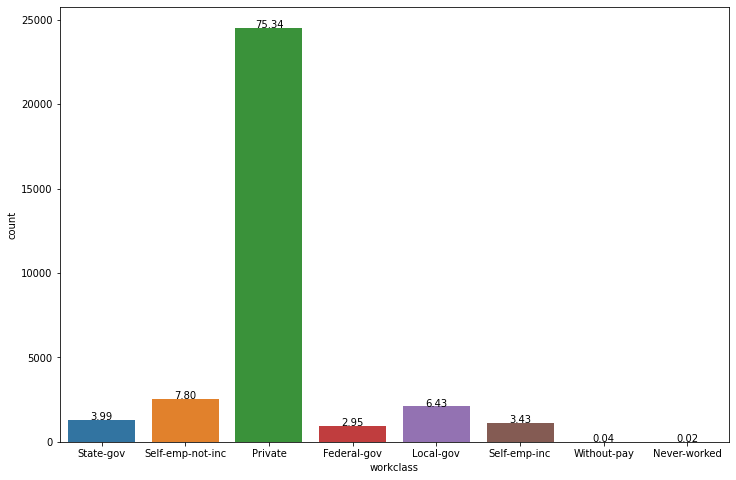

In [337]:
plt.figure(figsize=(12,8))
total = float(len(dataset['Income']))
ax = sns.countplot(x='workclass',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")



*   There are 8 unique categories present in the worclass attribute.

*   Most of them belong to the private workclass(36705) i.e. 75.15%.
*   There is huge imbalance in the categories of workclass attribute.



### EDUCATION

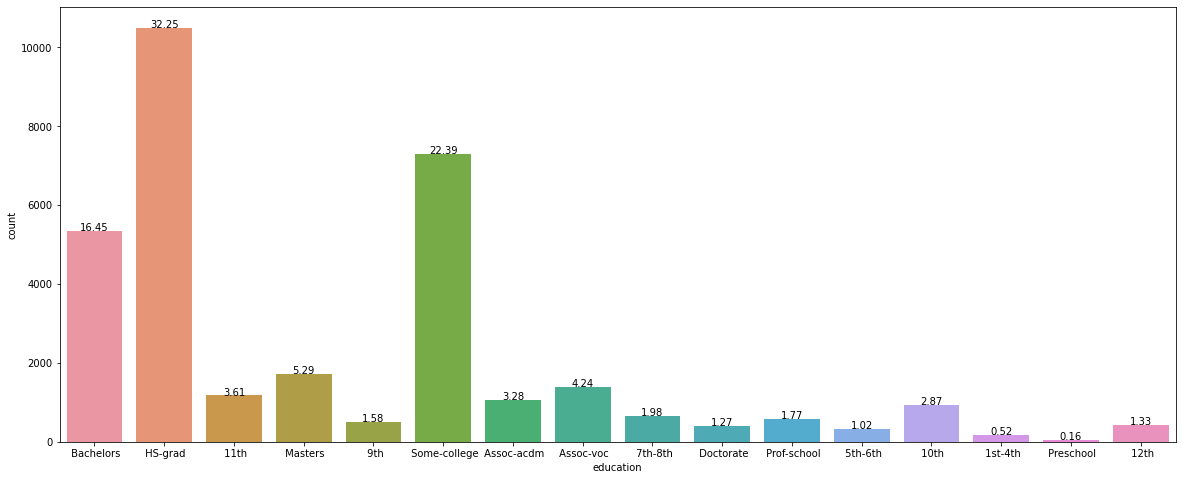

In [338]:
plt.figure(figsize=(20,8))
total = float(len(dataset['Income']))
ax = sns.countplot(x = 'education', data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height +3,
           '{:1.2f}'.format((height/total)*100),
           ha="center")



*   There are 16 unique categories present in the education attribute.

*   Hs-grad has 32.32% of all the education attribute.
*   Pre-school has minimum samples i.e. 83.




### MARITAL-STATUS

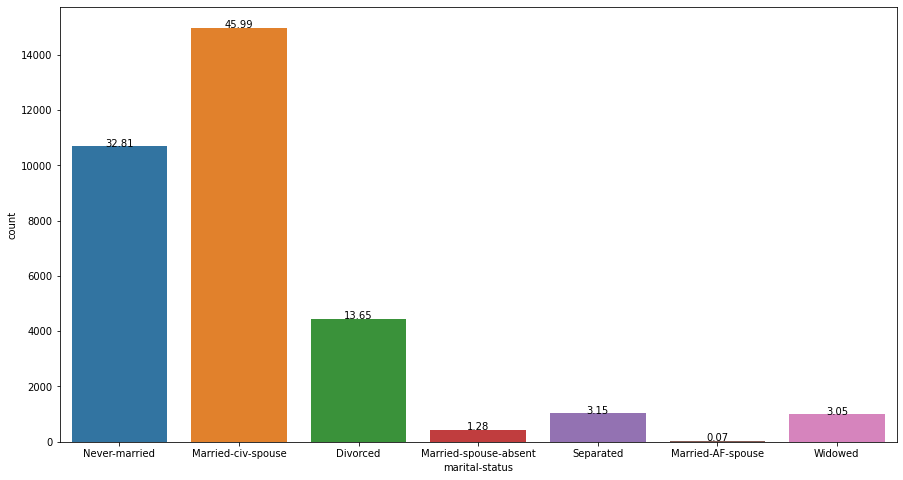

In [339]:
plt.figure(figsize=(15,8))
total = float(len(dataset['Income']))
ax = sns.countplot(x='marital-status',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha="center")



*   This marital-status attribute has 7 unique categories.

*   Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%)
*   Married-civ-spouse has maximum number of samples.



### OCCUPATION

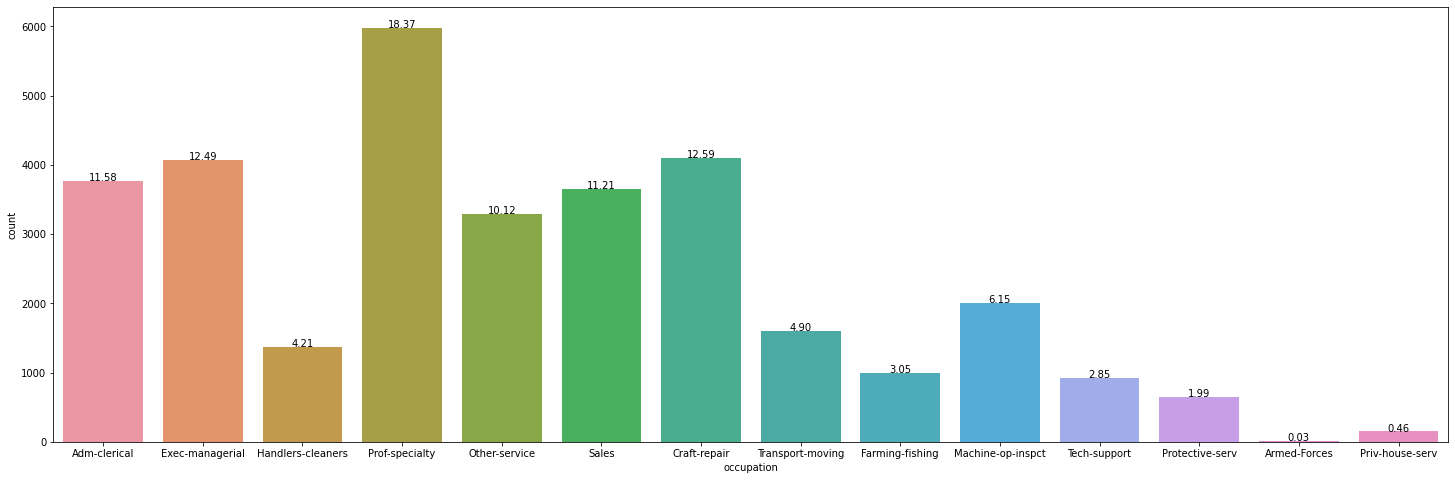

In [340]:
plt.figure(figsize=(25,8))
total=float(len(dataset['Income']))
ax = sns.countplot(x='occupation',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')



*   There are 14 unique categories present in the occupation attribute.
*   Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.



### RELATIONSHIP

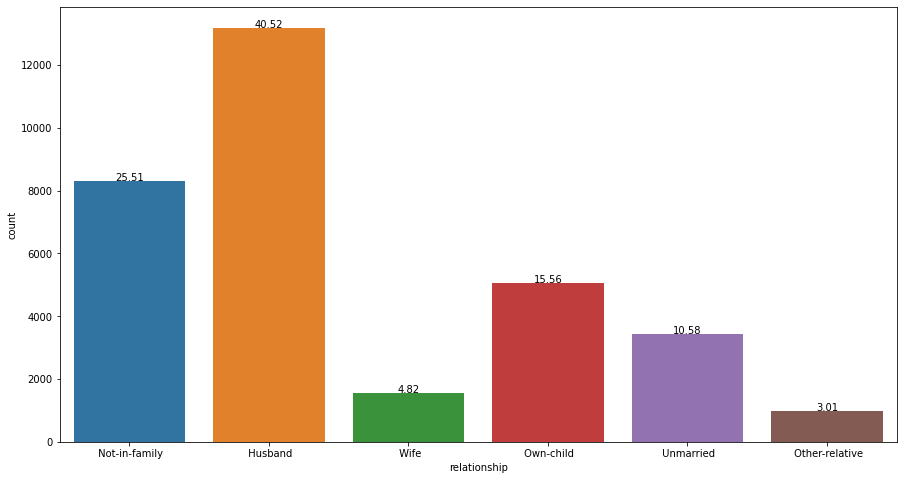

In [341]:
plt.figure(figsize=(15,8))
total=float(len(dataset['Income']))
ax = sns.countplot(x='relationship',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')



*   There are 6 unique categories in the relationship attribute.
*   Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)



### RACE

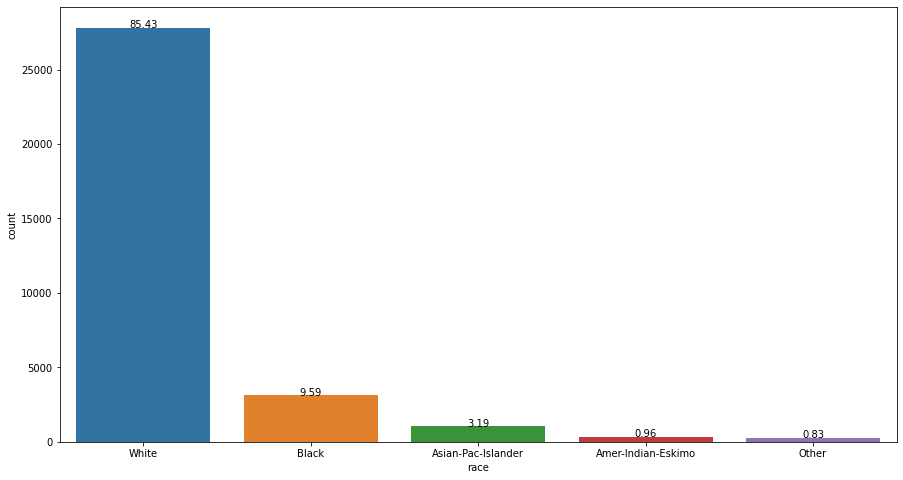

In [342]:
plt.figure(figsize=(15,8))
total=float(len(dataset['Income']))
ax = sns.countplot(x='race',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')



*   There are 5 unique categories in the race attribute

*   Most of them are "white" which is roughly 85.50%.
*   This dataset is totally bias toward the "white" race.


*   Second major race in the dataset is the "black" with just 9.59%.



### SEX

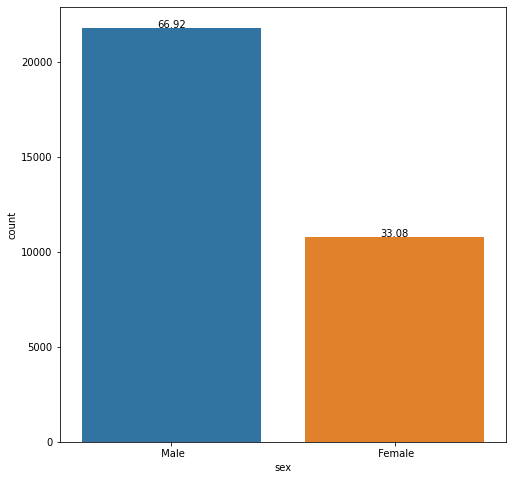

In [343]:
plt.figure(figsize=(8,8))
total=float(len(dataset['Income']))
ax = sns.countplot(x='sex',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')




*   Gender has 2 unique categories(male and female).
*   Distribution shows that this dataset is skewed toward the male with nearly 67%.



### NATIVE-COUNTRY

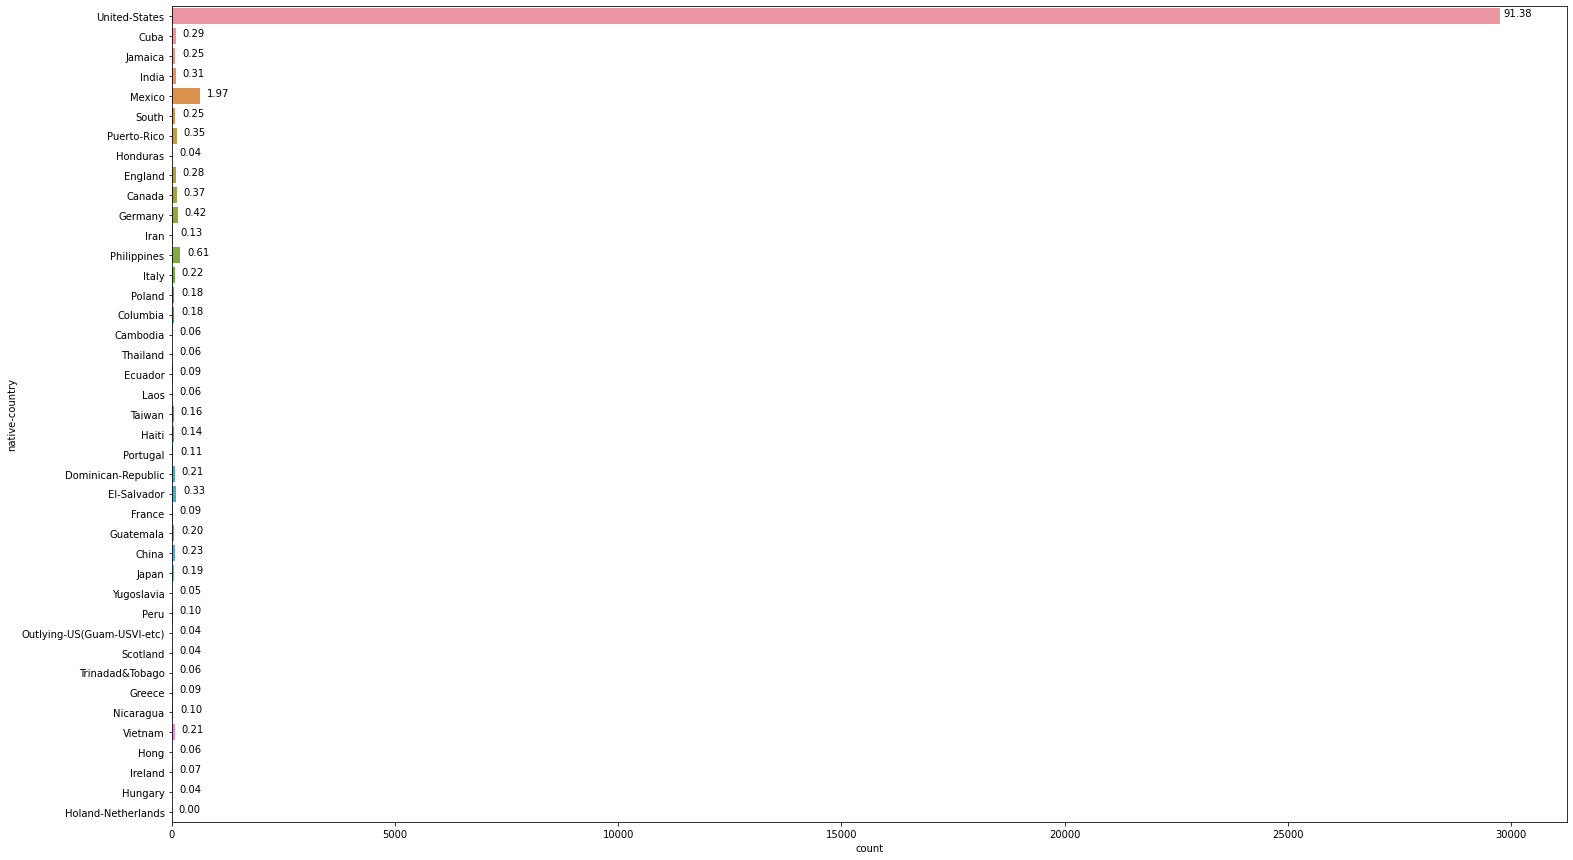

In [344]:
plt.figure(figsize=(25,15))
total=float(len(dataset['Income']))
ax = sns.countplot(y='native-country',data=dataset)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 400,
            p.get_y() + p.get_height()/2.,
           '{:1.2f}'.format((width/total)*100),
           ha='center')



*   This dataset is taken from the US.
*  As 91.5% of them have native country America and others are immigrants.



### INCOME

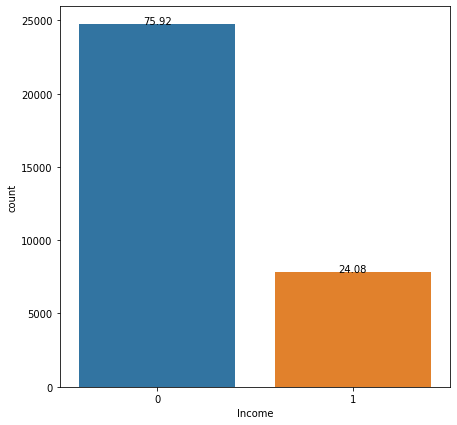

In [345]:
plt.figure(figsize=(7,7))
total = float(len(dataset) )

ax = sns.countplot(x="Income", data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 



*   This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).



# BIVARIATE ANALYSIS

### AGE

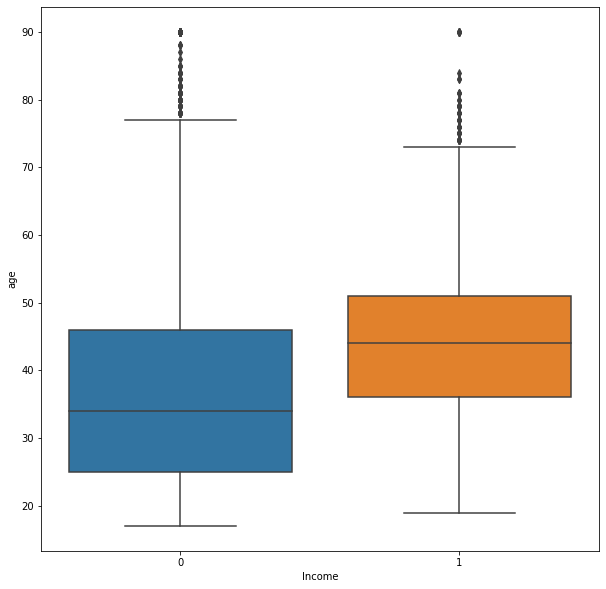

In [346]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Income',y='age',data=dataset)

#### Hypothesis Testing beteen Age and Income

In [347]:
dataset[['Income','age']].groupby('Income',as_index=False).mean().sort_values(by='age',ascending=False)

,Income,age
1,1,44.249841
0,0,36.783738


In [348]:
data = dataset.copy()

In [349]:
data = data[(np.abs(stats.zscore(data['age'])) < 3)]

In [350]:
income_1 = data[data['Income'] ==1]['age']
income_0 = data[data['Income']==0]['age']

In [351]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1,100)

In [352]:
ttest,pval = ttest_ind(income_0,income_1,equal_var=False)
print("ttest",ttest)
print("pvalue",pval)

ttest -2.9078889067842044
pvalue 0.0041017381841200636


Reject Null Hypothesis.
#### Age and Income are dependent

### HOURS-PER-WEEK

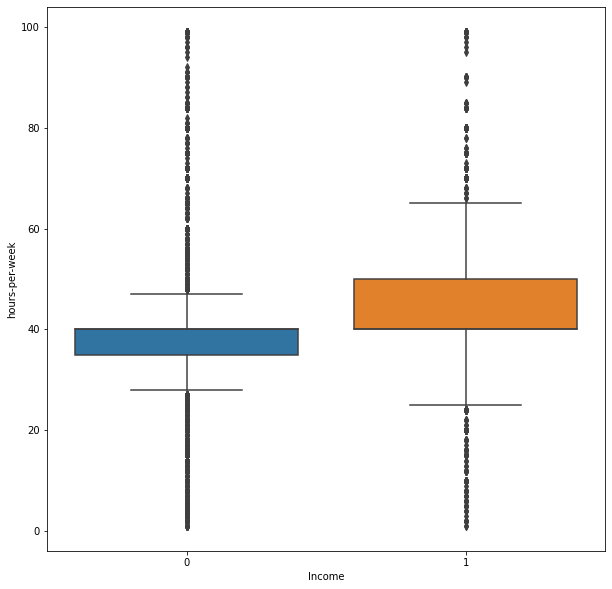

In [353]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Income',y='hours-per-week',data=dataset)

#### Hypothesis Testing beteen Hours per week and Income

In [354]:
data = dataset.copy()

In [355]:
data = data[np.abs(stats.zscore(data['hours-per-week'])) < 3]

In [356]:
data.shape

(32121, 15)

In [357]:
income_1 = data[data['Income'] == 1]['hours-per-week']
income_0 = data[data['Income'] == 0]['hours-per-week']

In [358]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1,100)

In [359]:
ttest,pval = ttest_ind(income_1,income_0,equal_var=False)
print("ttest ", ttest)
print('pvalue ',pval)

ttest  5.161266925255557
pvalue  6.091134312952887e-07


Reject Null Hypothesis
#### Hours-per-week and Income are dependent

### FNLWGT

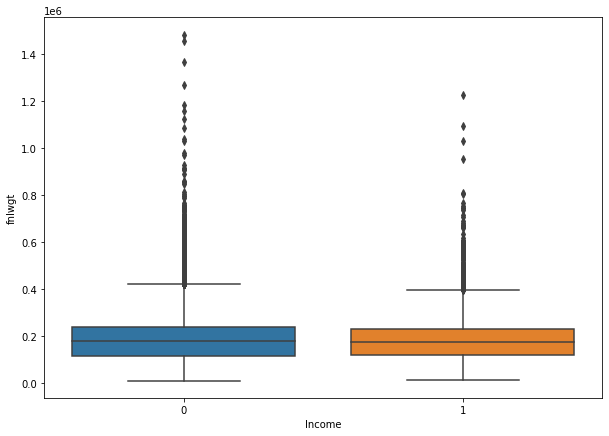

In [360]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',y='fnlwgt',data=dataset)

#### Hypothesis Testing beteen Fnlwgt and Income

In [361]:
data = dataset.copy()

In [362]:
data = data[np.abs(stats.zscore(dataset['fnlwgt'])) < 3]

In [363]:
income_1 = data[data['Income'] == 1]['fnlwgt']
income_0 = data[data['Income'] == 0]['fnlwgt']

In [364]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1,100)

In [365]:
ttest,pval = ttest_ind(income_0,income_1,equal_var=False)
print('ttest',ttest)
print('pvalue',pval)

ttest 1.6811477752638995
pvalue 0.0944362002079336


Fail to reject Null Hypothesis
#### Fnlwgt and Income are independent

### CAPITAL-GAIN

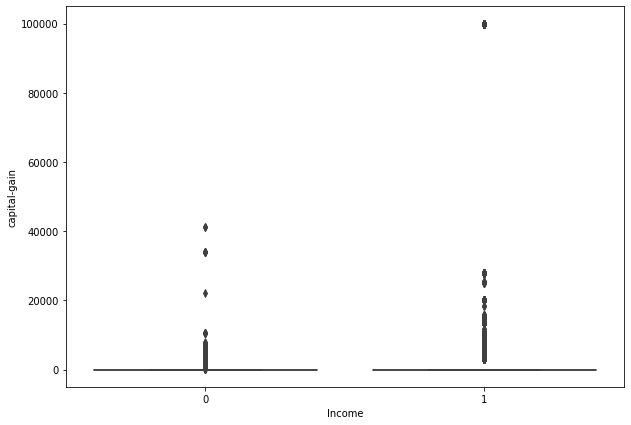

In [366]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',y='capital-gain',data=dataset)

#### Hypothesis Testing beteen capital-gain and Income

In [367]:
data = dataset.copy()

In [368]:
data = data[np.abs(stats.zscore(dataset['capital-gain'])) < 3]

In [369]:
income_1 = data[data['Income'] == 1]['capital-gain']
income_0 = data[data['Income'] == 0]['capital-gain']

In [370]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1,100)

In [371]:
ttest,pval = ttest_ind(income_0,income_1,equal_var=False)
print('ttest',ttest)
print('pvalues',pval)

ttest -3.4242567532741646
pvalues 0.0008899187252301149


Reject Null Hypothesis
#### Capital-gain and Income are dependent

### CAPITAL-LOSS

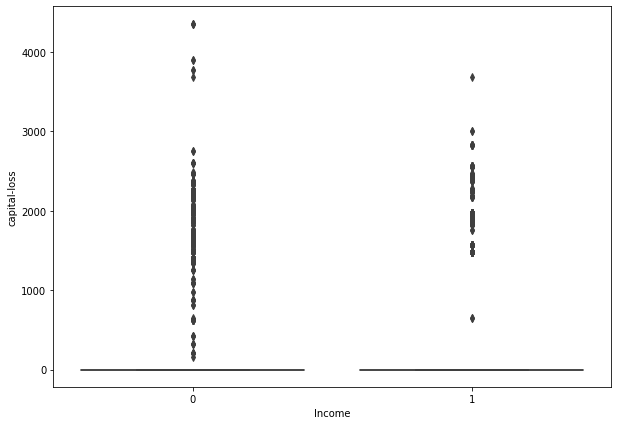

In [372]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',y='capital-loss',data=dataset)

#### Hypothesis Testing beteen capital-loss and Income

In [373]:
data = dataset.copy()

In [374]:
data = data[np.abs(stats.zscore(data['capital-loss'])) < 3]

In [375]:
income_1 = data[data['Income'] == 1]['capital-loss']
income_0 = data[data['Income'] == 0]['capital-loss']

In [376]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1,100)

In [377]:
ttest,pval = ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('pvalues',pval)

ttest nan
pvalues nan


Fail to reject Null Hypothesis
#### Capital-loss and Income are independent

## CATEGORICAL FEATURES

### WORKCLASS

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


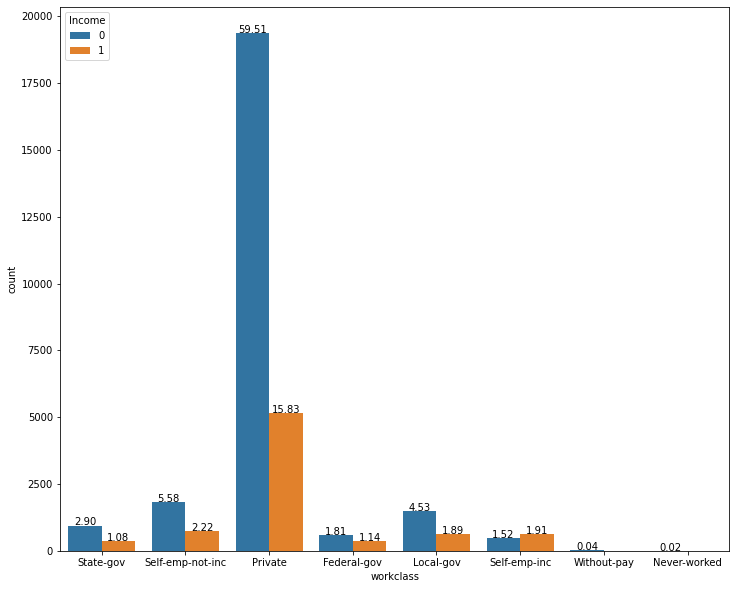

In [378]:
plt.figure(figsize=(12,10))
total = float(len(dataset['Income']))

ax = sns.countplot(x='workclass',hue='Income',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')

#### Hypothesis Testing beteen Workclass and Income

In [379]:
c_t = pd.crosstab(dataset['workclass'].sample(frac=0.002, random_state=42),
                 dataset['Income'].sample(frac=0.002,random_state=42),margins=False)
c_t

Income,0,1
workclass,,
Federal-gov,3,2
Local-gov,3,1
Private,35,12
Self-emp-inc,1,1
Self-emp-not-inc,3,1
State-gov,2,1


In [380]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' %dof)
print('p_value', p)
print(expected)

dof=5
p_value 0.9574559255860002
[[ 3.61538462  1.38461538]
 [ 2.89230769  1.10769231]
 [33.98461538 13.01538462]
 [ 1.44615385  0.55384615]
 [ 2.89230769  1.10769231]
 [ 2.16923077  0.83076923]]


In [381]:
prob = 0.95
critical = chi2.ppf(prob,dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' %(prob,critical,stat))

probability=0.950, critical=11.070, stat=1.061


Fail to reject Null Hypothesis
#### Workclass and Income are independent

### EDUCATION

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


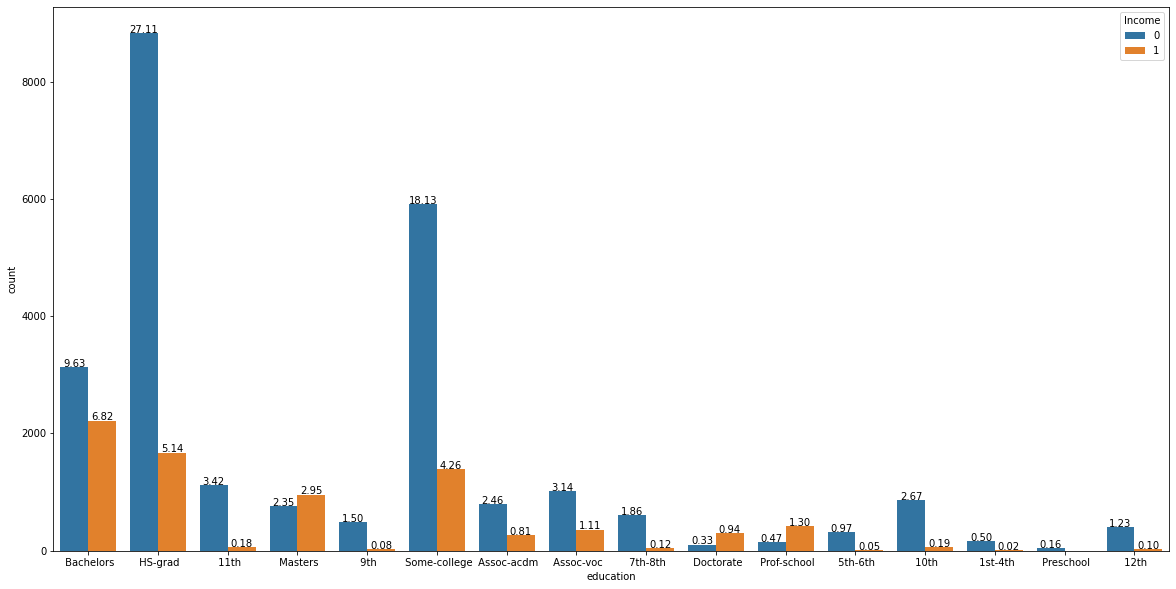

In [382]:
plt.figure(figsize=(20,10))
total = float(len(dataset['Income']))

ax = sns.countplot(x='education',hue='Income',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:.2f}'.format((height/total)*100),
           ha='center')

#### Hypothesis Testing beteen Education and Income

In [383]:
c_t = pd.crosstab(dataset['education'].sample(frac=0.002,replace=True,random_state=0),
                  dataset['Income'].sample(frac=0.002,replace=True,random_state=0),margins=False)

In [384]:
c_t

Income,0,1
education,,
10th,6,0
11th,1,0
5th-6th,1,0
7th-8th,2,1
9th,2,0
Assoc-acdm,2,0
Assoc-voc,1,0
Bachelors,5,1
Doctorate,0,2


In [385]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d'%dof)
print('p-value',p)
print(expected)

dof=12
p-value 0.0013526135560994535
[[ 4.43076923  1.56923077]
 [ 0.73846154  0.26153846]
 [ 0.73846154  0.26153846]
 [ 2.21538462  0.78461538]
 [ 1.47692308  0.52307692]
 [ 1.47692308  0.52307692]
 [ 0.73846154  0.26153846]
 [ 4.43076923  1.56923077]
 [ 1.47692308  0.52307692]
 [13.29230769  4.70769231]
 [ 3.69230769  1.30769231]
 [ 1.47692308  0.52307692]
 [11.81538462  4.18461538]]


In [386]:
prob=0.95
critical = chi2.ppf(prob,dof)
print('probability=%.3f, critical=%.3f, stat=%.3f'%(prob,critical,stat))

probability=0.950, critical=21.026, stat=32.064


Reject Null Hypothesis
#### Education and Income are dependent

### MARITAL-STATUS

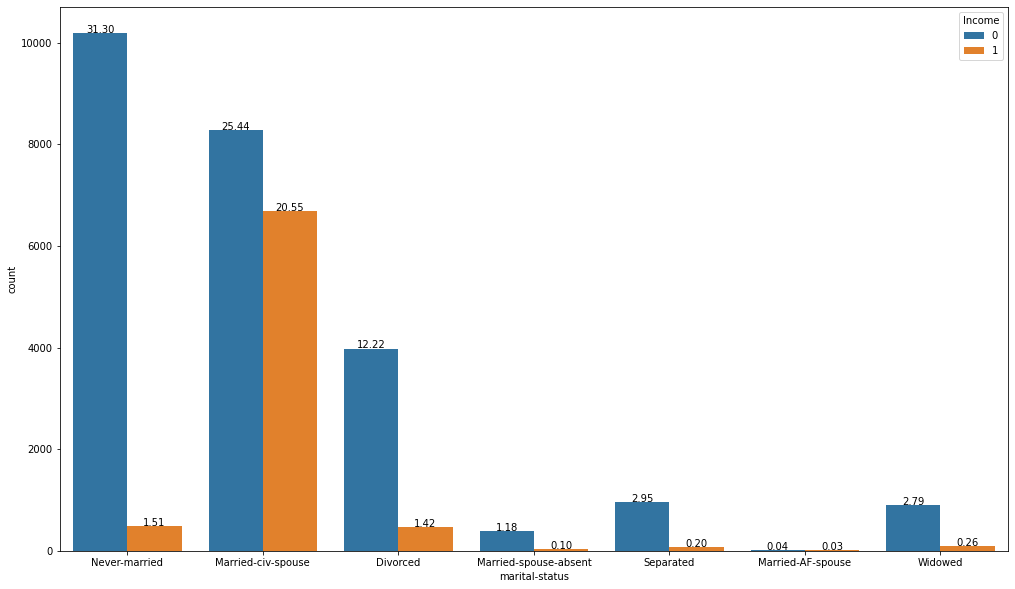

In [387]:
plt.figure(figsize=(17,10))
total = float(len(dataset['Income']))

ax = sns.countplot('marital-status', hue='Income', data=dataset)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')

#### Hypothesis Testing beteen Marital-Status and Income

In [388]:
c_t = pd.crosstab(dataset['marital-status'].sample(frac=0.002,random_state=42),
                 dataset['Income'].sample(frac=0.002,random_state=42),margins=False)

In [389]:
c_t

Income,0,1
marital-status,,
Divorced,13,0
Married-civ-spouse,10,17
Never-married,18,1
Separated,3,0
Widowed,3,0


In [390]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d'%dof)
print('p_value',p)
print(expected)

dof=4
p_value 8.48609524507223e-06
[[ 9.4         3.6       ]
 [19.52307692  7.47692308]
 [13.73846154  5.26153846]
 [ 2.16923077  0.83076923]
 [ 2.16923077  0.83076923]]


In [391]:
prob=0.95
critical = chi2.ppf(prob,dof)
print('probability=%.3f, critical=%.3f, stat=%.3f'%(prob,critical,stat))

probability=0.950, critical=9.488, stat=28.824


Reject Null Hypothesis
#### Marital-status and Income are dependent

### OCCUPATION

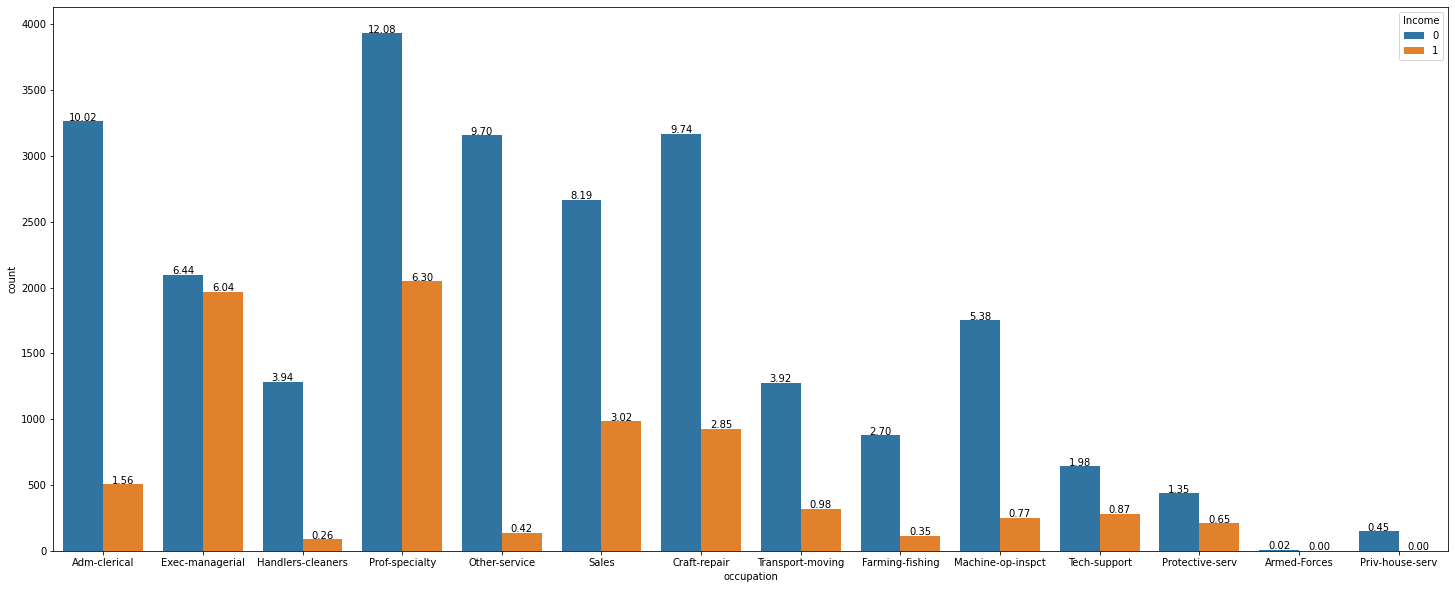

In [392]:
plt.figure(figsize=(25,10))
total = float(len(dataset['Income']))

ax = sns.countplot(x='occupation', hue='Income',data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')

#### Hypothesis Testing beteen Occupation and Income

In [393]:
c_t = pd.crosstab(dataset['occupation'].sample(frac=0.002, replace=True,random_state=42),
                 dataset['Income'].sample(frac=0.002,replace=True,random_state=42), margins=False)
c_t

Income,0,1
occupation,,
Adm-clerical,7,0
Craft-repair,6,1
Exec-managerial,4,7
Farming-fishing,3,0
Handlers-cleaners,2,1
Machine-op-inspct,6,0
Other-service,5,0
Priv-house-serv,1,0
Prof-specialty,8,3


In [394]:
stat,p,dof,expected = chi2_contingency(c_t)
print('dof=%d'%dof)
print('pvalue',p)
print(expected)

dof=10
pvalue 0.01111585655967645
[[5.06153846 1.93846154]
 [5.06153846 1.93846154]
 [7.95384615 3.04615385]
 [2.16923077 0.83076923]
 [2.16923077 0.83076923]
 [4.33846154 1.66153846]
 [3.61538462 1.38461538]
 [0.72307692 0.27692308]
 [7.95384615 3.04615385]
 [5.06153846 1.93846154]
 [2.89230769 1.10769231]]


In [395]:
prob=0.95
critical = chi2.ppf(prob,dof)
print('probability = %.3f critical = %.3f statistic = %.3f' %(prob,critical,stat))

probability = 0.950 critical = 18.307 statistic = 22.902


Reject Null Hypothesis

#### Occupation and Income are dependent

### RELATIONSHIP

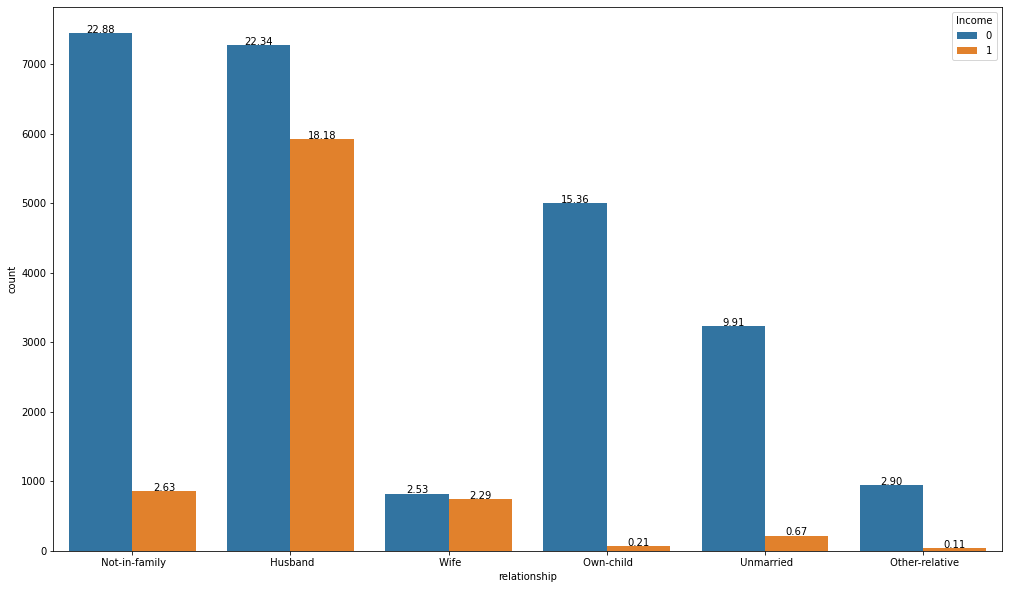

In [396]:
plt.figure(figsize=(17,10))
total = float(len(dataset['Income']))

ax = sns.countplot(x='relationship', hue='Income', data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')

#### Hypothesis Testing beteen Relationship and Income

In [397]:
c_t = pd.crosstab(dataset['relationship'].sample(frac=0.002,random_state=42),
                 dataset['Income'].sample(frac=0.002,random_state=42), margins=False)
c_t

Income,0,1
relationship,,
Husband,6,16
Not-in-family,18,1
Other-relative,2,0
Own-child,8,0
Unmarried,10,0
Wife,3,1


In [398]:
stat,p,dof,expected = chi2_contingency(c_t)
print('dof=%d'%dof)
print('pvalue',p)
print(expected)

dof=5
pvalue 1.7027151935130967e-06
[[15.90769231  6.09230769]
 [13.73846154  5.26153846]
 [ 1.44615385  0.55384615]
 [ 5.78461538  2.21538462]
 [ 7.23076923  2.76923077]
 [ 2.89230769  1.10769231]]


In [399]:
prob=0.95
critical = chi2.ppf(prob,dof)
print('probability = %.3f critical = %.3f statistic = %.3f' %(prob,critical,stat))

probability = 0.950 critical = 11.070 statistic = 34.731


Reject Null Hypothesis

#### Relationship and Income are dependent

### RACE

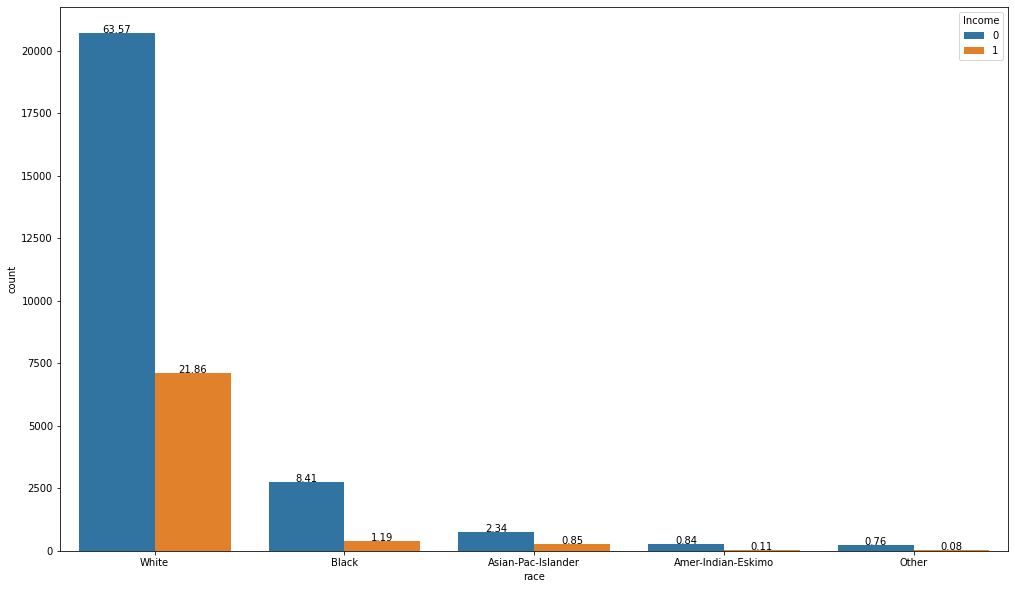

In [400]:
plt.figure(figsize=(17,10))
total = float(len(dataset['Income']))

ax = sns.countplot(x='race',hue='Income', data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')

#### Hypothesis Testing beteen Race and Income

In [401]:
c_t = pd.crosstab(dataset['race'].sample(frac=0.002, random_state=42),
                 dataset['Income'].sample(frac=0.002,random_state=42), margins=False)
c_t

Income,0,1
race,,
Black,6,1
Other,2,1
White,39,16


In [402]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d'%dof)
print('pvalue', p)
print(expected)

dof=2
pvalue 0.6942872029370282
[[ 5.06153846  1.93846154]
 [ 2.16923077  0.83076923]
 [39.76923077 15.23076923]]


In [403]:
prob=0.95
critical = chi2.ppf(prob, dof)
print('probability = %.3f critical = %.3f statisitic = %.3f' %(prob,critical,stat))

probability = 0.950 critical = 5.991 statisitic = 0.730


Accept Null Hypothesis

#### Race and Income are independent

### GENDER

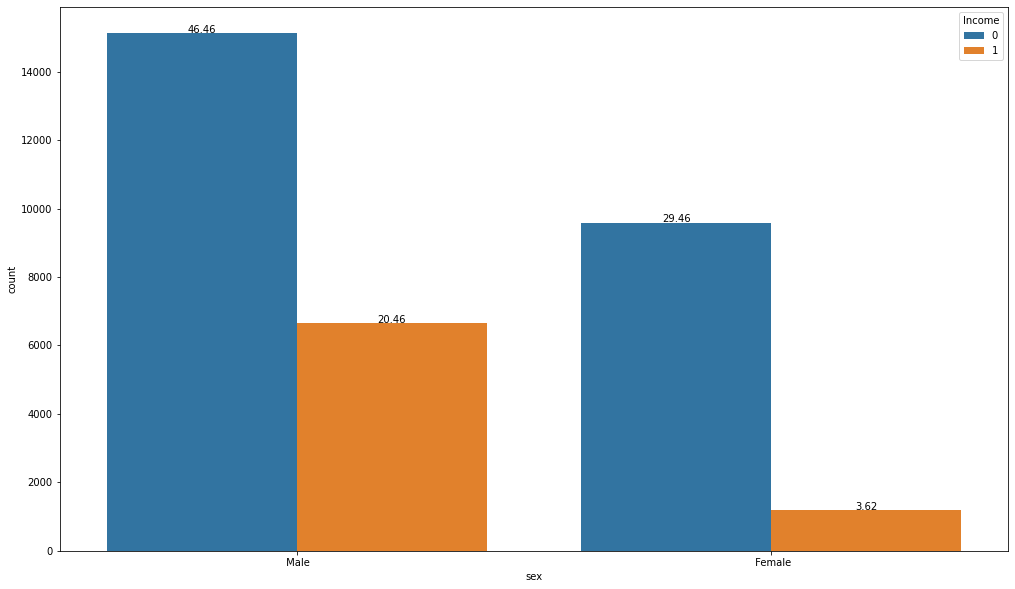

In [404]:
plt.figure(figsize=(17,10))
total = float(len(dataset['Income']))

ax = sns.countplot(x='sex',hue='Income', data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')

#### Hypothesis Testing beteen Gender and Income

In [405]:
c_t = pd.crosstab(dataset['sex'].sample(frac=0.002,random_state=42),
                 dataset['Income'].sample(frac=0.002,random_state=42), margins=False)
c_t

Income,0,1
sex,,
Female,25,1
Male,22,17


In [406]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d'%dof)
print('pvalue', p)
print(expected)

dof=1
pvalue 0.0012593668902692455
[[18.8  7.2]
 [28.2 10.8]]


In [407]:
prob=0.95
critical = chi2.ppf(prob, dof)
print('probability = %.3f critical = %.3f statisitic = %.3f' %(prob,critical,stat))

probability = 0.950 critical = 3.841 statisitic = 10.401


Reject Null Hypothesis

#### Gender and Income are dependent

### NATIVE-COUNTRY

#### Hypothesis Testing beteen Native Country and Income

In [408]:
c_t = pd.crosstab(dataset['native-country'].sample(frac=0.002,random_state=42),
                 dataset['Income'].sample(frac=0.002,random_state=42), margins=False)
c_t

Income,0,1
native-country,,
Columbia,1,0
El-Salvador,1,0
Mexico,1,0
Poland,1,0
Puerto-Rico,0,1
United-States,43,17


In [409]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d'%dof)
print('pvalue', p)
print(expected)

dof=5
pvalue 0.5272747858003257
[[ 0.72307692  0.27692308]
 [ 0.72307692  0.27692308]
 [ 0.72307692  0.27692308]
 [ 0.72307692  0.27692308]
 [ 0.72307692  0.27692308]
 [43.38461538 16.61538462]]


In [410]:
prob=0.95
critical = chi2.ppf(prob, dof)
print('probability = %.3f critical = %.3f statisitic = %.3f' %(prob,critical,stat))

probability = 0.950 critical = 11.070 statisitic = 4.155


Fail to reject Null Hypothesis

#### Native-country and Income are independent

## Correlation Matrix of Numerical Features

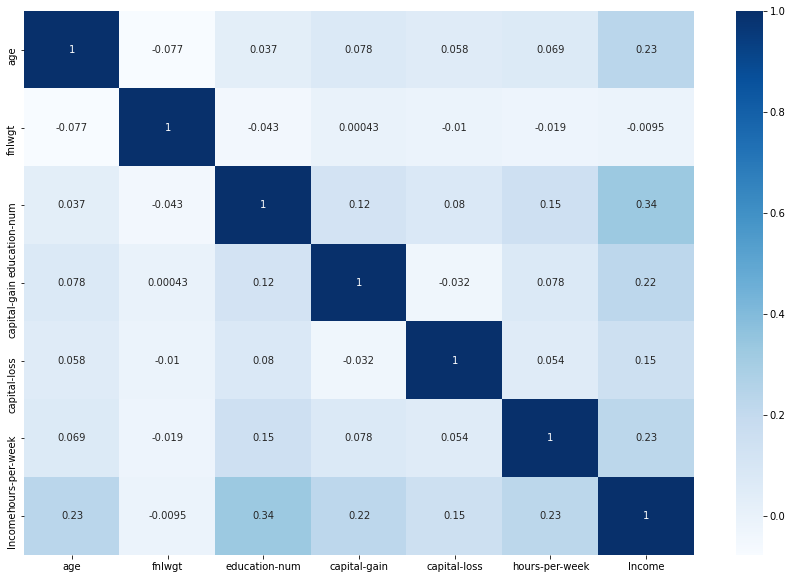

In [411]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')



*   There is no strong correlation among the numeric attributes.

*   There is neither strong positive nor strong negative correlation present in any variable .



#### Extracting a new feature from "capital-gain" and "capital-loss" called "capital-change"

In [412]:
dataset['capital-change'] = dataset['capital-gain'] - dataset['capital-loss']
dataset['capital-change'].describe()

count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-change, dtype: float64

## Capital-Change

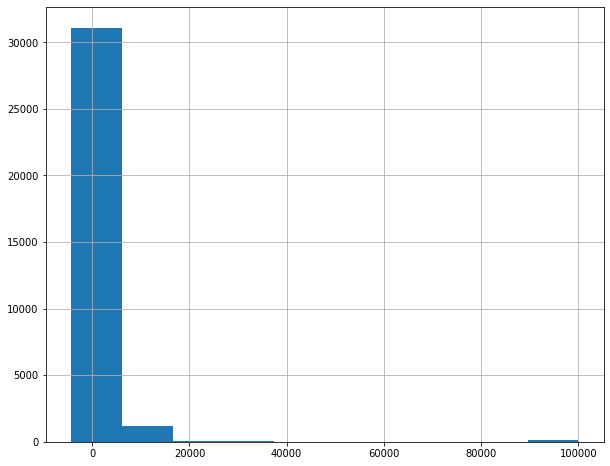

In [413]:
dataset['capital-change'].hist(figsize=(10,8))

#### Hypothesis Test between capital change and Income

In [414]:
data = dataset.copy()

In [415]:
data = data[np.abs(stats.zscore(data['capital-change'])) < 3]

In [416]:
income_1 = data[data['Income'] == 1]['capital-change']
income_0 = data[data['Income'] == 0]['capital-change']

In [417]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1,100)

In [418]:
tt, pval = ttest_ind(income_1,income_0,equal_var=False)
print('ttest',tt)
print('pvalue',pval)

ttest 2.7570871688306626
pvalue 0.006794874638681867


Reject Null Hypothesis

#### Capital-change and Income are dependent

In [419]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income,capital-change
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0


Dropping features after failing to reject Hypothesis Testing and "capital-gain" and "capital-loss". 

Alos dropping "education-num" as it gives exact info as "education"

In [420]:
dataset.drop(['workclass','fnlwgt','education-num', 'capital-loss','capital-gain','native-country'],axis=1,inplace=True)

In [421]:
dataset['education'] = dataset['education'].str.replace(" ","")
dataset['marital-status'] = dataset['marital-status'].str.replace(" ","")
dataset['occupation'] = dataset['occupation'].str.replace(" ","")
dataset['race'] = dataset['race'].str.replace(" ","")
dataset['relationship'] = dataset['relationship'].str.replace(" ","")
dataset['sex'] = dataset['sex'].str.replace(" ","")

In [422]:
data = dataset.copy()

## Mapping Categorical Features to Numeric Values

In [423]:
data['education'] = data['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [424]:
data['occupation'] = data['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [425]:
data['relationship'] = data['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [426]:
data['marital-status'] = data['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [427]:
data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [428]:
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [429]:
data.head()

,age,education,marital-status,occupation,relationship,race,sex,hours-per-week,Income,capital-change
0,39,12,5,3,0,3,0,40,0,2174
1,50,12,2,7,4,3,0,13,0,0
2,38,3,4,4,0,3,0,40,0,0
3,53,11,2,4,4,0,0,40,0,0
4,28,12,2,5,1,0,1,40,0,0


## Splitting dataset into Training and Test Set

In [430]:
y = data.loc[:,'Income'].values

In [431]:
data.drop('Income',axis=1,inplace=True)

In [432]:
x = data.values

In [433]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## Feature Scaling Numerical Features

In [434]:
sc = StandardScaler()
x_train[:,[0,7,8]] = sc.fit_transform(x_train[:,[0,7,8]])

In [435]:
x_test[:,[0,7,8]] = sc.transform(x_test[:,[0,7,8]])

## Function for Evaluating Model Performance

In [489]:
def score(y_pred,y_test):
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    accuracy = accuracy_score(y_test,y_pred)*100
    f1 = f1_score(y_test,y_pred)*100
    auc = roc_auc_score(y_test,y_pred)*100
    print("Accuracy Score", accuracy, "%")
    print("F1 Score", f1, "%")
    print("ROC_AUC Score", auc, "%")
    return (accuracy, auc)

# Models

### Logistic Regression

In [437]:
log_classifier = LogisticRegression(random_state=42)
log_classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [438]:
y_log_pred = log_classifier.predict(x_test)

In [490]:
lin_acc, lin_auc = score(y_test,y_log_pred)

[[5883 1517]
 [ 331  410]]
Accuracy Score 77.30008598452278 %
F1 Score 30.734632683658177 %
ROC_AUC Score 67.41531713900136 %


### KNN

In [440]:
knn_classifier = KNeighborsClassifier(n_neighbors=30)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [441]:
y_knn_pred = knn_classifier.predict(x_test)

In [491]:
knn_acc, knn_auc = score(y_test,y_knn_pred)

[[5762  964]
 [ 452  963]]
Accuracy Score 82.60655939073824 %
F1 Score 57.63016157989227 %
ROC_AUC Score 76.86204791490013 %


### SVC Linear

In [443]:
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [444]:
y_svc_pred = svc_classifier.predict(x_test)

In [492]:
svc_acc, svc_auc = score(y_test,y_svc_pred)

[[6212 1724]
 [   2  203]]
Accuracy Score 78.79867338164844 %
F1 Score 19.04315196998124 %
ROC_AUC Score 88.65029996066089 %


### SVC RBF

In [446]:
kernel_classifier = SVC(kernel='rbf', random_state=42)
kernel_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [447]:
y_kernel_pred = kernel_classifier.predict(x_test)

In [493]:
kernel_acc, kernel_auc = score(y_test,y_kernel_pred)

[[5933 1312]
 [ 281  615]]
Accuracy Score 80.43237931458052 %
F1 Score 43.570669500531345 %
ROC_AUC Score 75.26467606970326 %


### Naive Bayes

In [449]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [450]:
y_nb_pred = nb_classifier.predict(x_test)

In [494]:
nb_acc, nb_auc = score(y_test,y_nb_pred)

[[6212 1724]
 [   2  203]]
Accuracy Score 78.79867338164844 %
F1 Score 19.04315196998124 %
ROC_AUC Score 88.65029996066089 %


### Decision Tree

In [452]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [453]:
y_dt_pred = dt_classifier.predict(x_test)

In [495]:
dt_acc, dt_auc = score(y_test,y_dt_pred)

[[5661  831]
 [ 553 1096]]
Accuracy Score 82.99963149490235 %
F1 Score 61.297539149888145 %
ROC_AUC Score 76.83207713407218 %


### Random Forrest

In [455]:
rf_classifier = RandomForestClassifier(criterion='entropy', random_state=42)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [456]:
y_rf_pred = rf_classifier.predict(x_test)

In [496]:
rf_acc, rf_auc = score(y_test,y_rf_pred)

[[5684  782]
 [ 530 1145]]
Accuracy Score 83.88404372927158 %
F1 Score 63.57579122709607 %
ROC_AUC Score 78.13208932141026 %


### XGBoost

In [458]:
xgb_classifier = xgb.XGBClassifier()

In [459]:
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [460]:
random_search = RandomizedSearchCV(xgb_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [461]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   25.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [462]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [463]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 10,
 'min_child_weight': 3}

In [464]:
xgboost_classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=3,
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1)

In [465]:
xgboost_classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
              n_jobs=8, nthread=None, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=1)

In [466]:
y_xgb_pred = xgboost_classifier.predict(x_test)

In [497]:
xgb_acc, xgb_auc = score(y_test,y_xgb_pred)

[[5790  814]
 [ 424 1113]]
Accuracy Score 84.79302297015109 %
F1 Score 64.26096997690532 %
ROC_AUC Score 80.04396499509178 %


In [509]:
cv_score = cross_val_score(xgboost_classifier,x_train,y_train,cv=10)

In [510]:
cv_score.mean()

0.8401719901719902

## Comparing Model Performance

In [498]:
model_accuracy = [lin_acc, knn_acc, svc_acc, kernel_acc, nb_acc, dt_acc, rf_acc, xgb_acc]
model_auc = [lin_auc, knn_auc, svc_auc, kernel_auc, nb_auc, dt_auc, rf_auc, xgb_auc]
models=["Logistic Regression", "KNN", "SVC Linear", "SVC Kernel", "Naive Bayes", "Decision Tree", "Random Forrest", "XGBoost"]

Text(0.5, 1.0, 'Comparing Model Accuracy(Test Set)')

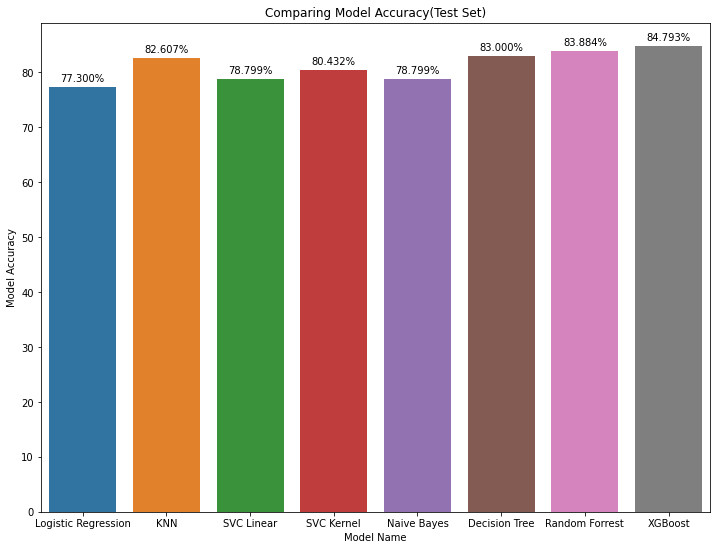

In [523]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models, y=model_accuracy)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')
  
plt.ylabel('Model Accuracy')
plt.xlabel('Model Name')
plt.title('Comparing Model Accuracy(Test Set)')

Text(0.5, 1.0, 'Comparing Model AUC Score(Test Set)')

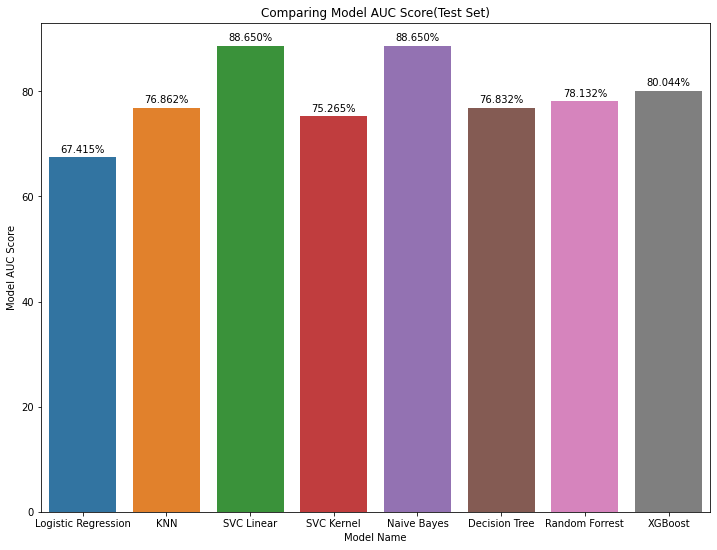

In [524]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models, y=model_auc)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')
  
plt.ylabel('Model AUC Score')
plt.xlabel('Model Name')
plt.title('Comparing Model AUC Score(Test Set)')

Since the dataset is imbalanced, AUC score is important as well.

XGBoost has the best accuracy. But Naive Bayes and SVC Linear have the best AUC score. Hence we will take these 3 and perform Cross validation to choose the best model.

## Cross Validation

### Accuracy

In [512]:
svc_cv = cross_val_score(svc_classifier,x_train, y_train, cv=10, scoring='accuracy')
nb_cv = cross_val_score(nb_classifier, x_train, y_train, cv=10, scoring='accuracy')
xgb_cv = cross_val_score(xgboost_classifier, x_train, y_train, cv=10, scoring='accuracy')

In [521]:
print("Cross Validation Score for SVC Linear Model is: {:1.3f} +- {:1.3f}".format(svc_cv.mean()*100, svc_cv.std()*100))
print("Cross Validation Score for Naive Bayes Model is: {:1.3f} +- {:1.3f}".format(nb_cv.mean()*100, nb_cv.std()*100))
print("Cross Validation Score for XGBoost Model is: {:1.3f} +- {:1.3f}".format(xgb_cv.mean()*100, xgb_cv.std()*100))

Cross Validation Score for SVC Linear Model is: 78.329 +- 0.188
Cross Validation Score for Naive Bayes Model is: 78.321 +- 0.197
Cross Validation Score for XGBoost Model is: 84.017 +- 0.374


As expected, XGBoost has the best accuracy out of the three.

### ROC_AUC

In [514]:
svc_cv_auc = cross_val_score(svc_classifier,x_train, y_train, cv=10, scoring='roc_auc')
nb_cv_auc = cross_val_score(nb_classifier, x_train, y_train, cv=10, scoring='roc_auc')
xgb_cv_auc = cross_val_score(xgboost_classifier, x_train, y_train, cv=10, scoring='roc_auc')

In [522]:
print("Cross Validation Score for SVC Linear Model(AUC) is: {:1.3f} +- {:1.3f}".format(svc_cv_auc.mean()*100, svc_cv_auc.std()*100))
print("Cross Validation Score for Naive Bayes Model(AUC) is: {:1.3f} +- {:1.3f}".format(nb_cv_auc.mean()*100, nb_cv_auc.std()*100))
print("Cross Validation Score for XGBoost Model(AUC) is: {:1.3f} +- {:1.3f}".format(xgb_cv_auc.mean()*100, xgb_cv_auc.std()*100))

Cross Validation Score for SVC Linear Model(AUC) is: 79.219 +- 1.052
Cross Validation Score for Naive Bayes Model(AUC) is: 83.211 +- 0.513
Cross Validation Score for XGBoost Model(AUC) is: 89.645 +- 0.406


Here we see a different result compared to the test set. XGBoost outperforms the other two even with the ROC_AUC score.

# XGBoost is the best model